In [27]:
%pip install -q -U kaggle_environments


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
%%writefile rock_agent.py

# Agent that always plays Rock
def rock_agent(observation, configuration):
    return 0  # 0: Rock

Writing rock_agent.py


In [29]:
%%writefile paper_agent.py

# Agent that always plays Paper
def paper_agent(observation, configuration):
    return 1  # 1: Paper

Writing paper_agent.py


In [30]:
%%writefile scissors_agent.py

# Agent that always plays Scissors
def scissors_agent(observation, configuration):
    return 2  # 2: Scissors

Writing scissors_agent.py


In [31]:
%%writefile random_agent.py

import random

# Agent that plays a random move
def random_agent(observation, configuration):
    import random
    return random.randrange(0, configuration.signs)

Writing random_agent.py


In [32]:
%%writefile copy_opponent_agent.py

# Agent that copies the opponent's last move
def copy_opponent_agent(observation, configuration):
    import random
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randrange(0, configuration.signs)

Writing copy_opponent_agent.py


In [33]:
%%writefile beat_last_move_agent.py

# Agent that plays the move that beats the opponent's last move
def beat_last_move_agent(observation, configuration):
    import random
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % configuration.signs
    else:
        return random.randrange(0, configuration.signs)

Writing beat_last_move_agent.py


In [34]:
%%writefile rotate_moves_agent.py

# Agent that cycles through the moves in order
def rotate_moves_agent(observation, configuration):
    return observation.step % configuration.signs

Writing rotate_moves_agent.py


In [35]:
%%writefile mirror_self_agent.py

# Agent that repeats its own last move
def mirror_self_agent(observation, configuration):
    import random
    if observation.step > 0:
        return observation.agentAction
    else:
        return random.randrange(0, configuration.signs)

Writing mirror_self_agent.py


In [36]:
%%writefile statistical_agent.py

# Agent that tracks opponent's moves and beats the most frequent one
def statistical_agent(observation, configuration):
    import random
    if observation.step == 0:
        statistical_agent.action_histogram = {}
        return random.randrange(0, configuration.signs)
    else:
        opponent_action = observation.lastOpponentAction
        histogram = statistical_agent.action_histogram
        histogram[opponent_action] = histogram.get(opponent_action, 0) + 1
        most_common = max(histogram, key=histogram.get)
        # Play the move that beats the opponent's most frequent move
        return (most_common + 1) % configuration.signs

Writing statistical_agent.py


In [37]:
%%writefile anti_statistical_agent.py

# Agent that tracks opponent's moves and beats the least frequent one
def anti_statistical_agent(observation, configuration):
    import random
    if observation.step == 0:
        anti_statistical_agent.action_histogram = {}
        return random.randrange(0, configuration.signs)
    else:
        opponent_action = observation.lastOpponentAction
        histogram = anti_statistical_agent.action_histogram
        histogram[opponent_action] = histogram.get(opponent_action, 0) + 1
        least_common = min(histogram, key=histogram.get)
        # Play the move that beats the opponent's least frequent move
        return (least_common + 1) % configuration.signs

Writing anti_statistical_agent.py


In [38]:
%%writefile anti_last_move_agent.py

# Agent that plays the move that loses to the opponent's last move
def anti_last_move_agent(observation, configuration):
    import random
    if observation.step > 0:
        return (observation.lastOpponentAction + 2) % configuration.signs
    else:
        return random.randrange(0, configuration.signs)

Writing anti_last_move_agent.py


In [39]:
%%writefile biased_random_agent.py

# Agent that plays Rock more frequently
def biased_random_agent(observation, configuration):
    import random
    choice = random.random()
    if choice < 0.6:
        return 0  # Rock
    elif choice < 0.8:
        return 1  # Paper
    else:
        return 2  # Scissors

Writing biased_random_agent.py


In [40]:
%%writefile frequency_analysis_agent.py

# Agent that predicts the opponent's next move based on frequency analysis
def frequency_analysis_agent(observation, configuration):
    import random
    if observation.step == 0:
        frequency_analysis_agent.action_histogram = {}
        return random.randrange(0, configuration.signs)
    else:
        opponent_action = observation.lastOpponentAction
        histogram = frequency_analysis_agent.action_histogram
        histogram[opponent_action] = histogram.get(opponent_action, 0) + 1
        # Predict opponent's next move
        predicted_move = max(histogram, key=histogram.get)
        # Play the move that beats the predicted move
        return (predicted_move + 1) % configuration.signs

Writing frequency_analysis_agent.py


In [41]:
%%writefile pattern_detector_agent.py

# Agent that tries to detect patterns in the opponent's moves
def pattern_detector_agent(observation, configuration):
    import random
    if observation.step < 2:
        pattern_detector_agent.last_moves = []
        return random.randrange(0, configuration.signs)
    else:
        opponent_action = observation.lastOpponentAction
        pattern_detector_agent.last_moves.append(opponent_action)
        # Simple pattern detection: if the opponent repeats the same move
        if pattern_detector_agent.last_moves[-1] == pattern_detector_agent.last_moves[-2]:
            # Assume the opponent will repeat again
            predicted_move = opponent_action
        else:
            predicted_move = random.randrange(0, configuration.signs)
        # Play the move that beats the predicted move
        return (predicted_move + 1) % configuration.signs

Writing pattern_detector_agent.py


In [42]:
%%writefile level2_random_agent.py

# Agent that uses a predefined sequence
def level2_random_agent(observation, configuration):
    sequence = [0, 1, 2, 0, 1, 2]
    return sequence[observation.step % len(sequence)]

Writing level2_random_agent.py


In [43]:
import os
import pandas as pd
from kaggle_environments import make, evaluate

# List of agent filenames
agent_files = [
  "rock_agent.py",
  "paper_agent.py",
  "scissors_agent.py",
  "random_agent.py",
  "copy_opponent_agent.py",
  "beat_last_move_agent.py",
  "rotate_moves_agent.py",
  "mirror_self_agent.py",
  "statistical_agent.py",
  "anti_statistical_agent.py",
  "anti_last_move_agent.py",
  "biased_random_agent.py",
  "frequency_analysis_agent.py",
  "pattern_detector_agent.py",
  "level2_random_agent.py",
]

# Verify that all files exist
for agent_file in agent_files:
  assert os.path.exists(agent_file), f"Agent file {agent_file} not found."

In [44]:
# Prepare a DataFrame to store the results
agent_names = [af.replace("_agent.py", "") for af in agent_files]
results = pd.DataFrame(0, index=agent_names, columns=agent_names)

# Number of rounds in each match
num_rounds = 100

# Run the tournament
for i, agent1 in enumerate(agent_files):
  for j, agent2 in enumerate(agent_files):
      if i != j:
          # Evaluate the match between agent1 and agent2
          scores = evaluate(
              "rps",  # Rock-Paper-Scissors environment
              [agent1, agent2],
              configuration={"episodeSteps": num_rounds},
              num_episodes=1,
          )
          # The result is a list of [reward1, reward2]
          reward_agent1 = scores[0][0]
          results.at[agent_names[i], agent_names[j]] = reward_agent1
      else:
          # No need to play against self
          results.at[agent_names[i], agent_names[j]] = 0

In [45]:
# Calculate total scores
results['Total Score'] = results.sum(axis=1)

# Calculate win rates
num_opponents = len(agent_names) - 1
max_score = num_opponents * num_rounds  # Maximum possible score
results['Win Rate'] = results['Total Score'] / max_score

# Sort agents by total score
results = results.sort_values(by='Total Score', ascending=False)

# Display the results
print("Tournament Results:")
print(results[['Total Score', 'Win Rate']])

Tournament Results:
                    Total Score  Win Rate
frequency_analysis        503.0  0.359286
statistical               498.0  0.355714
beat_last_move            382.0  0.272857
anti_statistical          274.0  0.195714
random                      2.0  0.001429
pattern_detector            1.0  0.000714
mirror_self                 0.0  0.000000
biased_random             -66.0 -0.047143
rotate_moves              -93.0 -0.066429
level2_random             -93.0 -0.066429
anti_last_move           -189.0 -0.135000
paper                    -252.0 -0.180000
rock                     -292.0 -0.208571
scissors                 -337.0 -0.240714
copy_opponent            -383.0 -0.273571


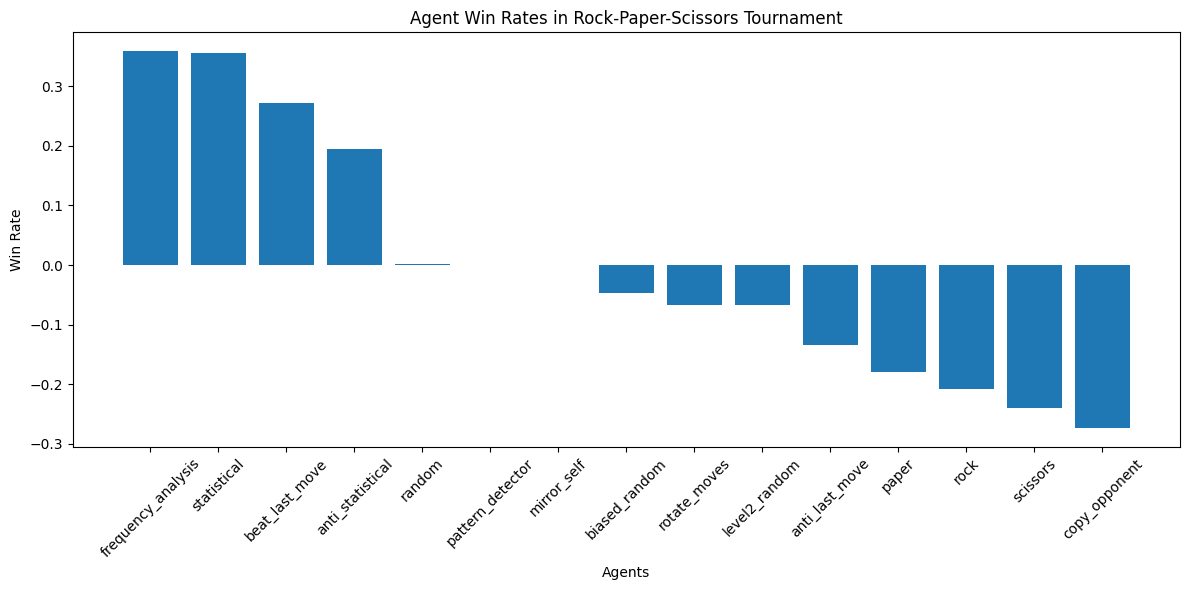

In [46]:
import matplotlib.pyplot as plt

# Plotting the Win Rates
plt.figure(figsize=(12, 6))
plt.bar(results.index, results['Win Rate'])
plt.xlabel('Agents')
plt.ylabel('Win Rate')
plt.title('Agent Win Rates in Rock-Paper-Scissors Tournament')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()